In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
# import dask.dataframe as dd
from pathlib import Path
import seaborn as sns

# %matplotlib inline

In [2]:
# data_path = '/home/rayandrew/Data/azure-data/vmtable.csv.gz'
data_path = '/home/rayandrew/Projects/anl-cl/raw_data/azure/vmcpu.parquet'
headers = ['vmid','subscriptionid','deploymentid','vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'p95maxcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket']
# trace_dataframe = pd.read_csv(data_path, header=None, index_col=False, names=headers, delimiter=',')
trace_dataframe = pd.read_parquet(data_path, columns=headers, engine="fastparquet")
trace_dataframe = trace_dataframe.sort_values(by=["vmdeleted"]).reset_index(drop=True)
trace_dataframe.head()

,vmid,subscriptionid,deploymentid,vmcreated,vmdeleted,maxcpu,avgcpu,p95maxcpu,vmcategory,vmcorecountbucket,vmmemorybucket
0,VXGOFs+UvurxdZwbMKQFOAUGLLDEcuZ16Z571pEg5o4xGR...,2rFlT+eDM/S9WUUPK0dgsYUAvHJvOwz8SZxjVVJKVkx0yn...,Lg9BhCFTVdbetfgHm0SNVC3U1u1WQ02h6JY4Dc3B1EE6yW...,0,0,26.145941,9.610978,26.145941,Unknown,2,8
1,6AF4YRKyTypQQOjJTvDSk2/DJ23cBu1lQwXB7yxFb3sDOu...,5uVt5XpvI+xMxYgs34MfbcX9iITjsopZl7mptHxEbmxaB6...,WRIccg/h3Ud9wxPdnmOvhlFCkTcBgweVsJSZ0O6HYzQJj5...,0,0,0.356106,0.313852,0.356106,Unknown,2,4
2,xuK9OvM2tUJFgeJiOU5lahhzrbltInX6RP0htWMy6Ghkzg...,wA+NjFBhsKDx+8aBOS/6S1q0poOnhIjD8c8SswoR9isthg...,0Kj50+yzaaJ1lVYZISpt8OkEnAiE1Li8HaUSAI3OL/J6C+...,0,0,0.671804,0.539965,0.671804,Unknown,2,8
3,hi+BdsQ+vNouAUqov6IEwMzaZ4gtBRmT9SsP9Qa7ipXDM2...,T5YgbHHsKY6pX+pei3XcWWpIvtVWWkZQFnMYy4VtXV0riR...,/M/NNfrx6jUC97ev+QgMyH6DyFdCcAerLZg+z/Bhenbedn...,0,0,10.007839,7.462821,10.007839,Unknown,4,8
4,HwjVveebzWKml4zL33XIpEFgkLHi2nGAQQW56ZfthoJhUS...,ZWsJmK98wp0h+ICo8NVE0buqwmxwjrth9iPeJgNWJue90w...,6IPETzEOT+QfzrHJyebQ4+ai12EGm7qmwBC9R0z62oyzG1...,0,0,0.071183,0.037814,0.071183,Unknown,4,32


611
19751


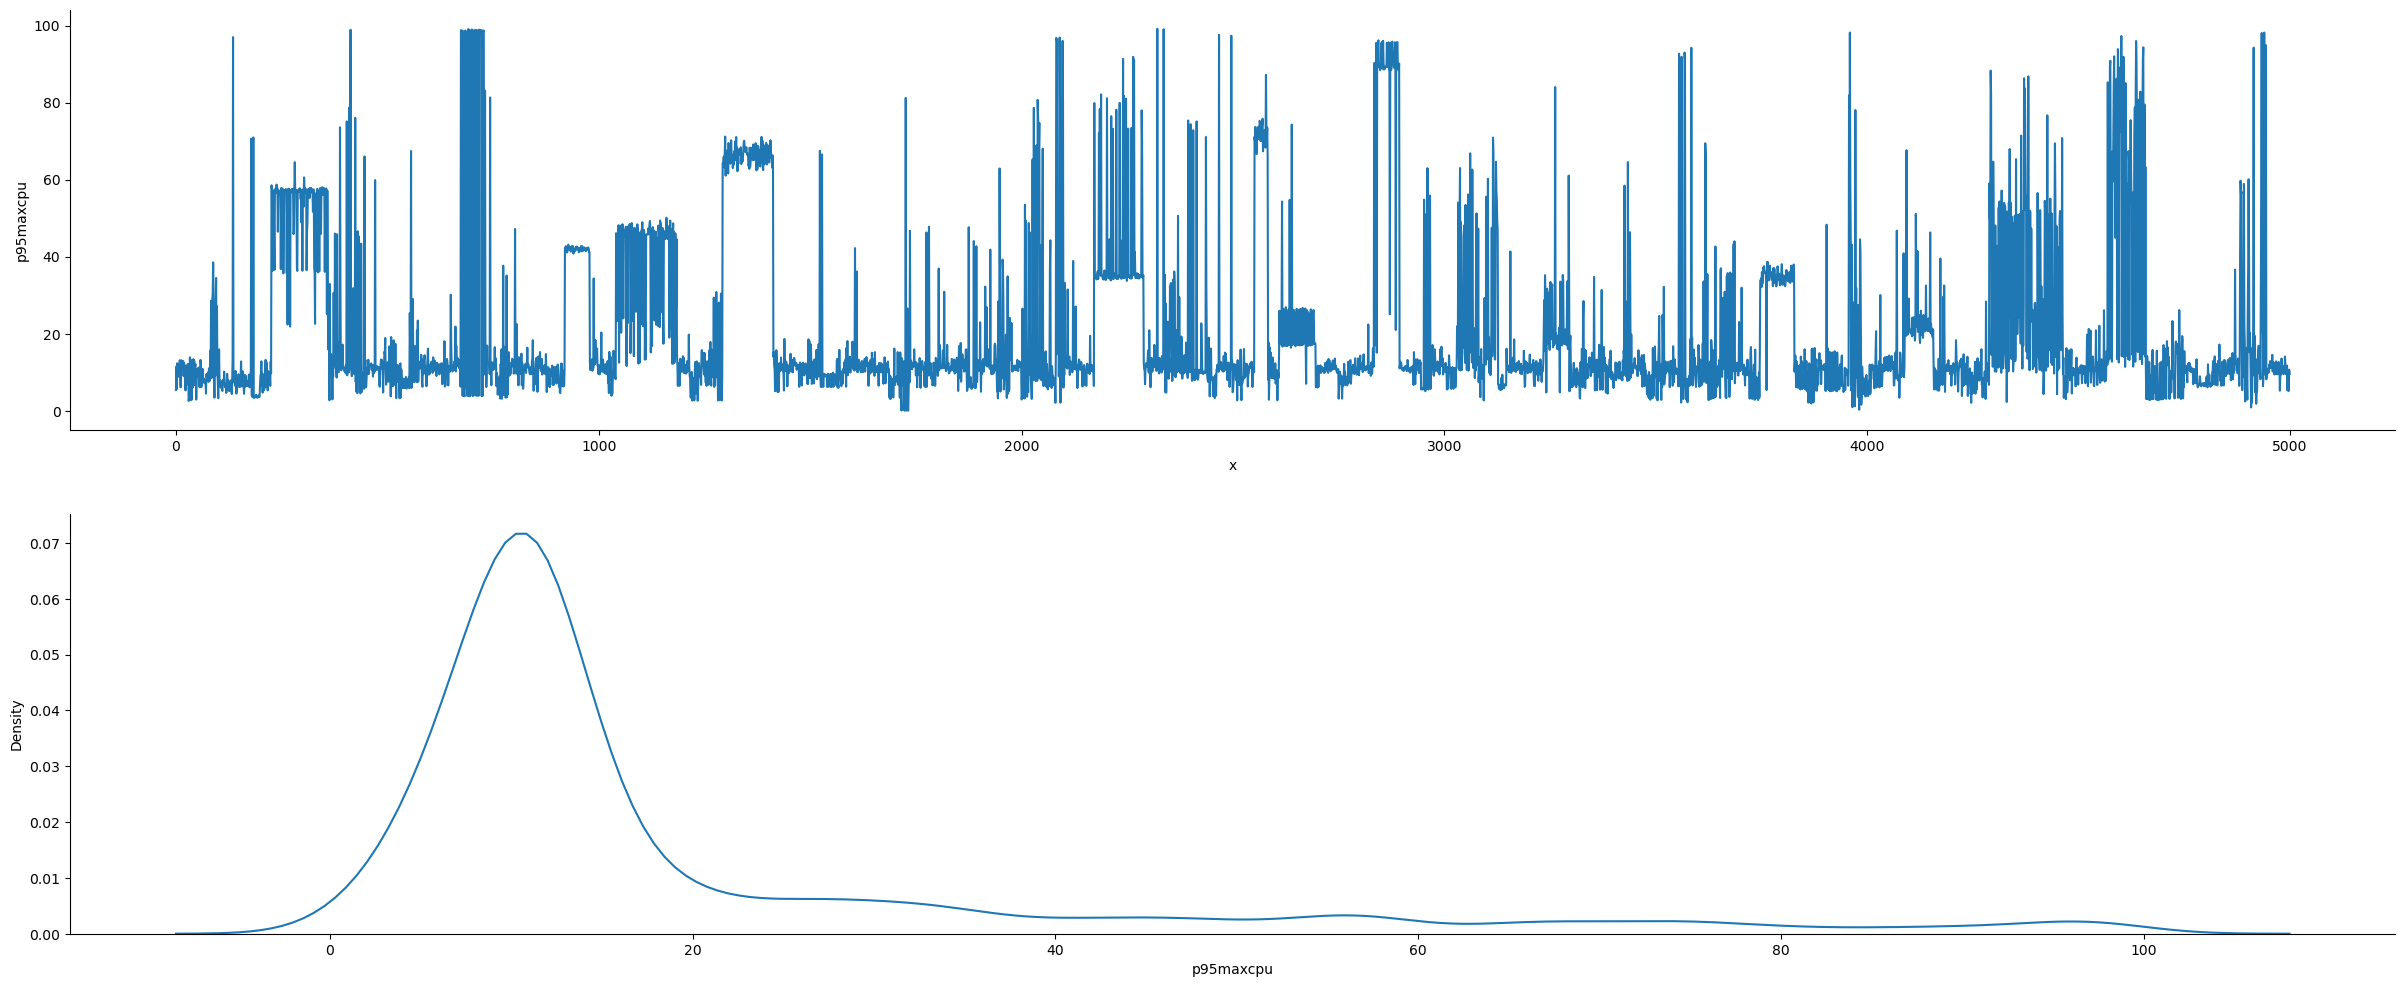

In [40]:
grouped_df = trace_dataframe.groupby(by=["deploymentid"])
# grouped_df = trace_dataframe.groupby(by=["subscriptionid"])
dfs = []
count = 0
for i, (g, dep_df) in enumerate(grouped_df):
    if count == 1000:
        break
    if len(dep_df) < 20:
        continue
    # display(dep_df)
    if len(dep_df.vmcreated.unique()) != 1 or len(dep_df.vmdeleted.unique()) != 1:
        continue
    # print(dep_df.vmcreated.unique(), dep_df.vmdeleted.unique())
    dep_df = dep_df.copy()
    # dep_df["id"] = count + 1
    # print(len(dep_df))
    # dep_df.reset_index(drop=True).plot(y="p95maxcpu")
    dfs.append(dep_df)
    count+=1

print(len(dfs))
df = pd.concat(dfs).reset_index(drop=True)
df = df.sort_values(by=["deploymentid", "subscriptionid", "vmcreated", "vmdeleted"]).reset_index(drop=True)
df["x"] = [i for i in range(len(df))]
print(len(df))
# sns.color_palette("hls", 8)
# sns.color_palette("Paired")
fig, axs = plt.subplots(2, 1, figsize=(30, 12))
sns.lineplot(data=df.iloc[0:5000], x="x", y="p95maxcpu", ax=axs[0]) # , hue="id"
sns.kdeplot(data=df, x="p95maxcpu", ax=axs[1]) # , hue="id"
# axs[1].get_legend().remove()
# sns.ecdfplot(data=df, x="p95maxcpu", hue="id", ax=axs[1])
sns.despine()
fig.show()

[  16200   16500   17100   16800       0   33600   75600   75900   78600
   78300   97800   97200  101400  101100  102600  102900  103500  103200
  111900  144300  144000  147900   50400  187500  187800   52800   52500
  132900   83400  216300  219900  219600   52200  231000  230400  109200
  240000  241500  241800  123900  156600  167700  224700  224400  306600
  306000   73200   73500  189900  321000  320700  323100  304800  304500
  333600  333900  331800  207900  340500  359400  361800  362100  362700
  362400  370200  245100  225300  248400  375000  255600  384600  322500
  394200  393900  395400  402000  398100  405000  277800  409200  413100
  412800  411000  411300  311400  445500  445200  448200  448500  449100
  447300  322200  452400  385200  455400  455700  312000  312300  477900
  479700  480000  359100  502200  502800  388200  391800  524400  524700
  525000  534600  534900  535200  535500  469500  469200  421200  400800
  400500  453900  547200  547800  465300  468900  5

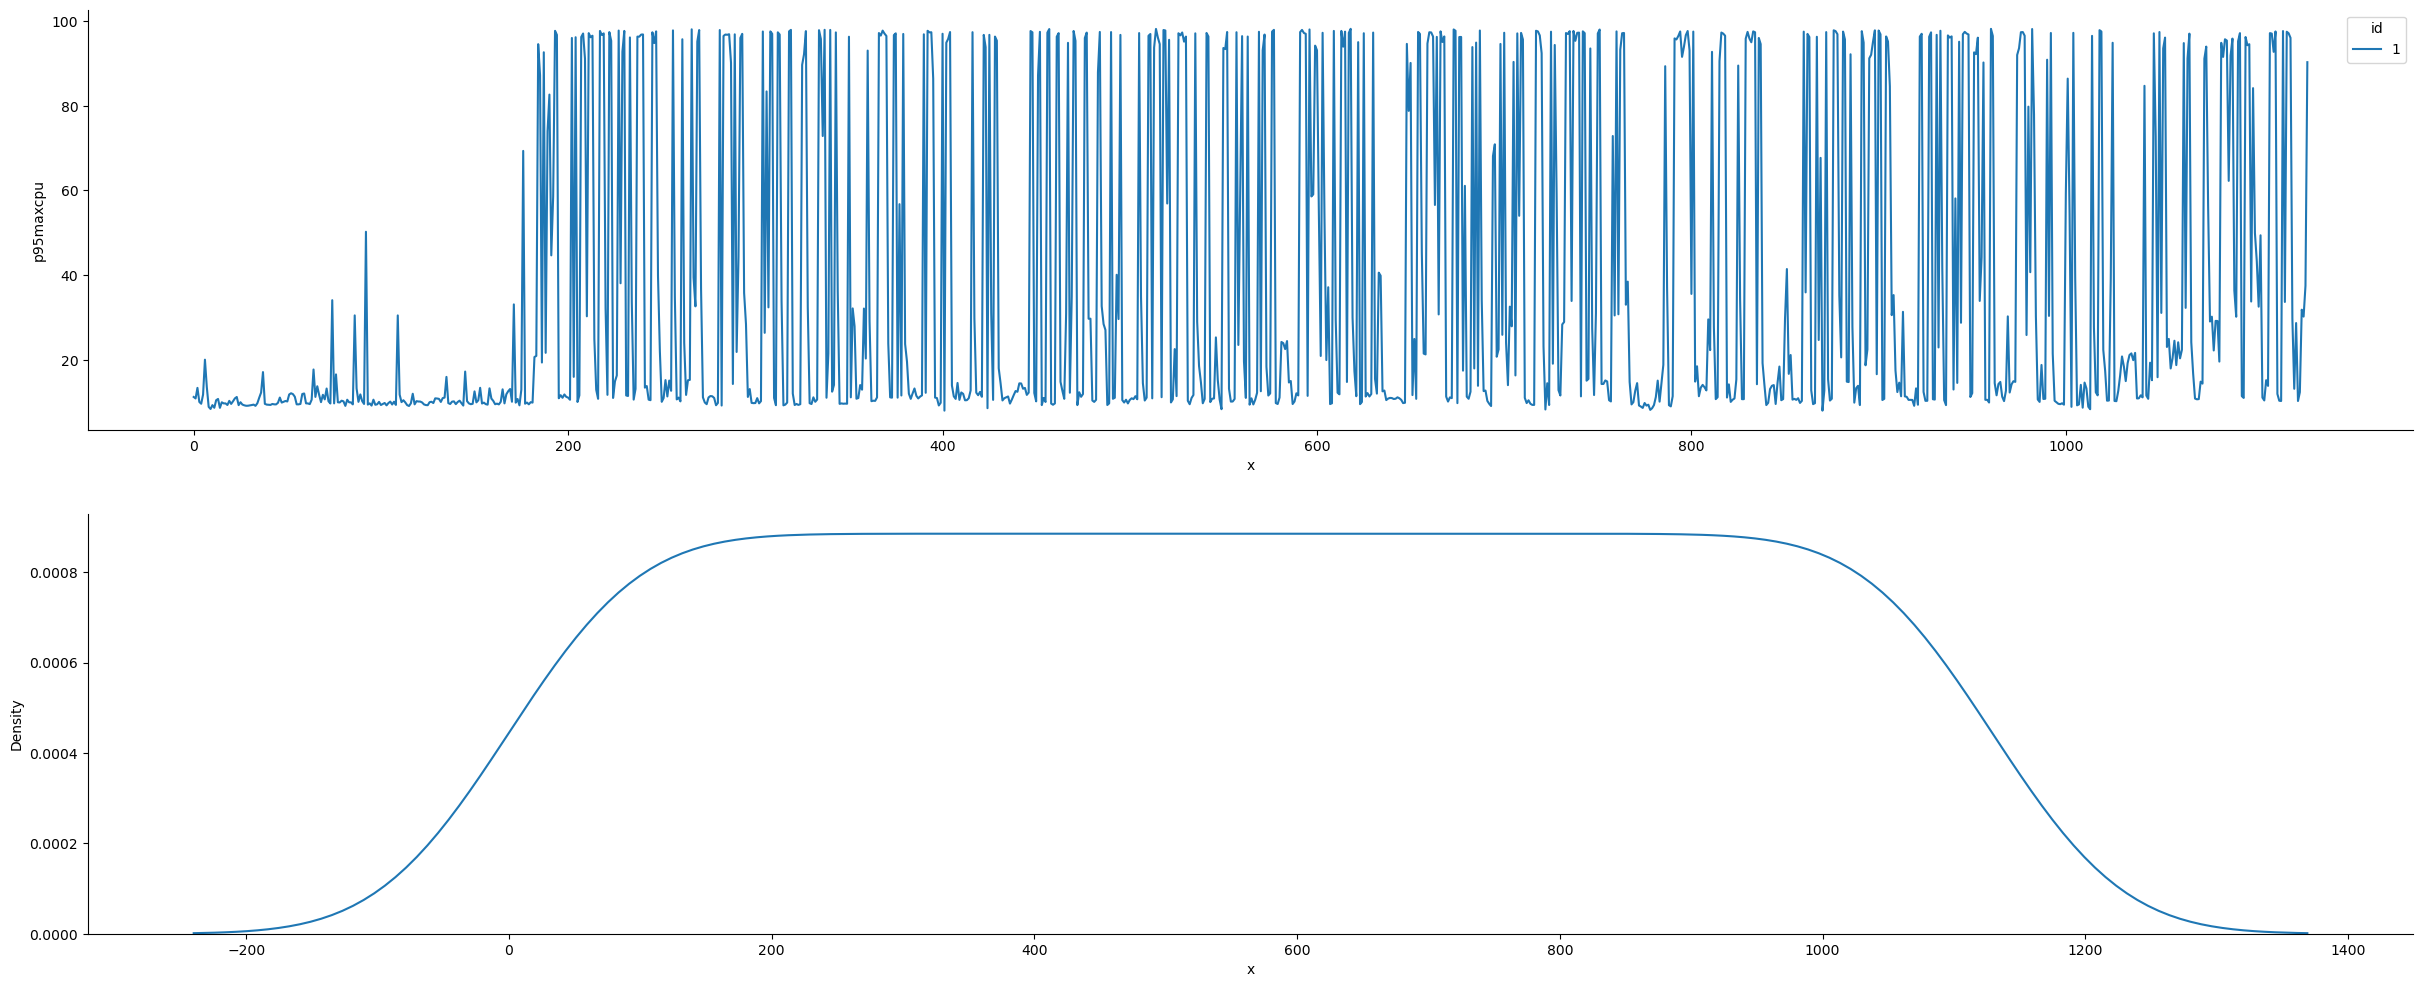

[      0  102900  103200  275700  276000  448500  448800  621300  621600
  794100  794700  967500 1140000 1312800 1312500 1485600 1485300 1658400
 1658100 1830900 1831200 2003400 2003700 2176800 2176500 2349000 2349300
 1389300 2522100 2522400  902700] [  18900  192000  192600  364800  365400  537300  537900  710400  711000
  883200  883800  902400 1056000 1056600 1228800 1229400 1386300 1401600
 1402200 1574400 1575000 1746900 1747800 1920000 1920600 2092800 2093100
 2265600 2266200 2438400 2439000 2591400]


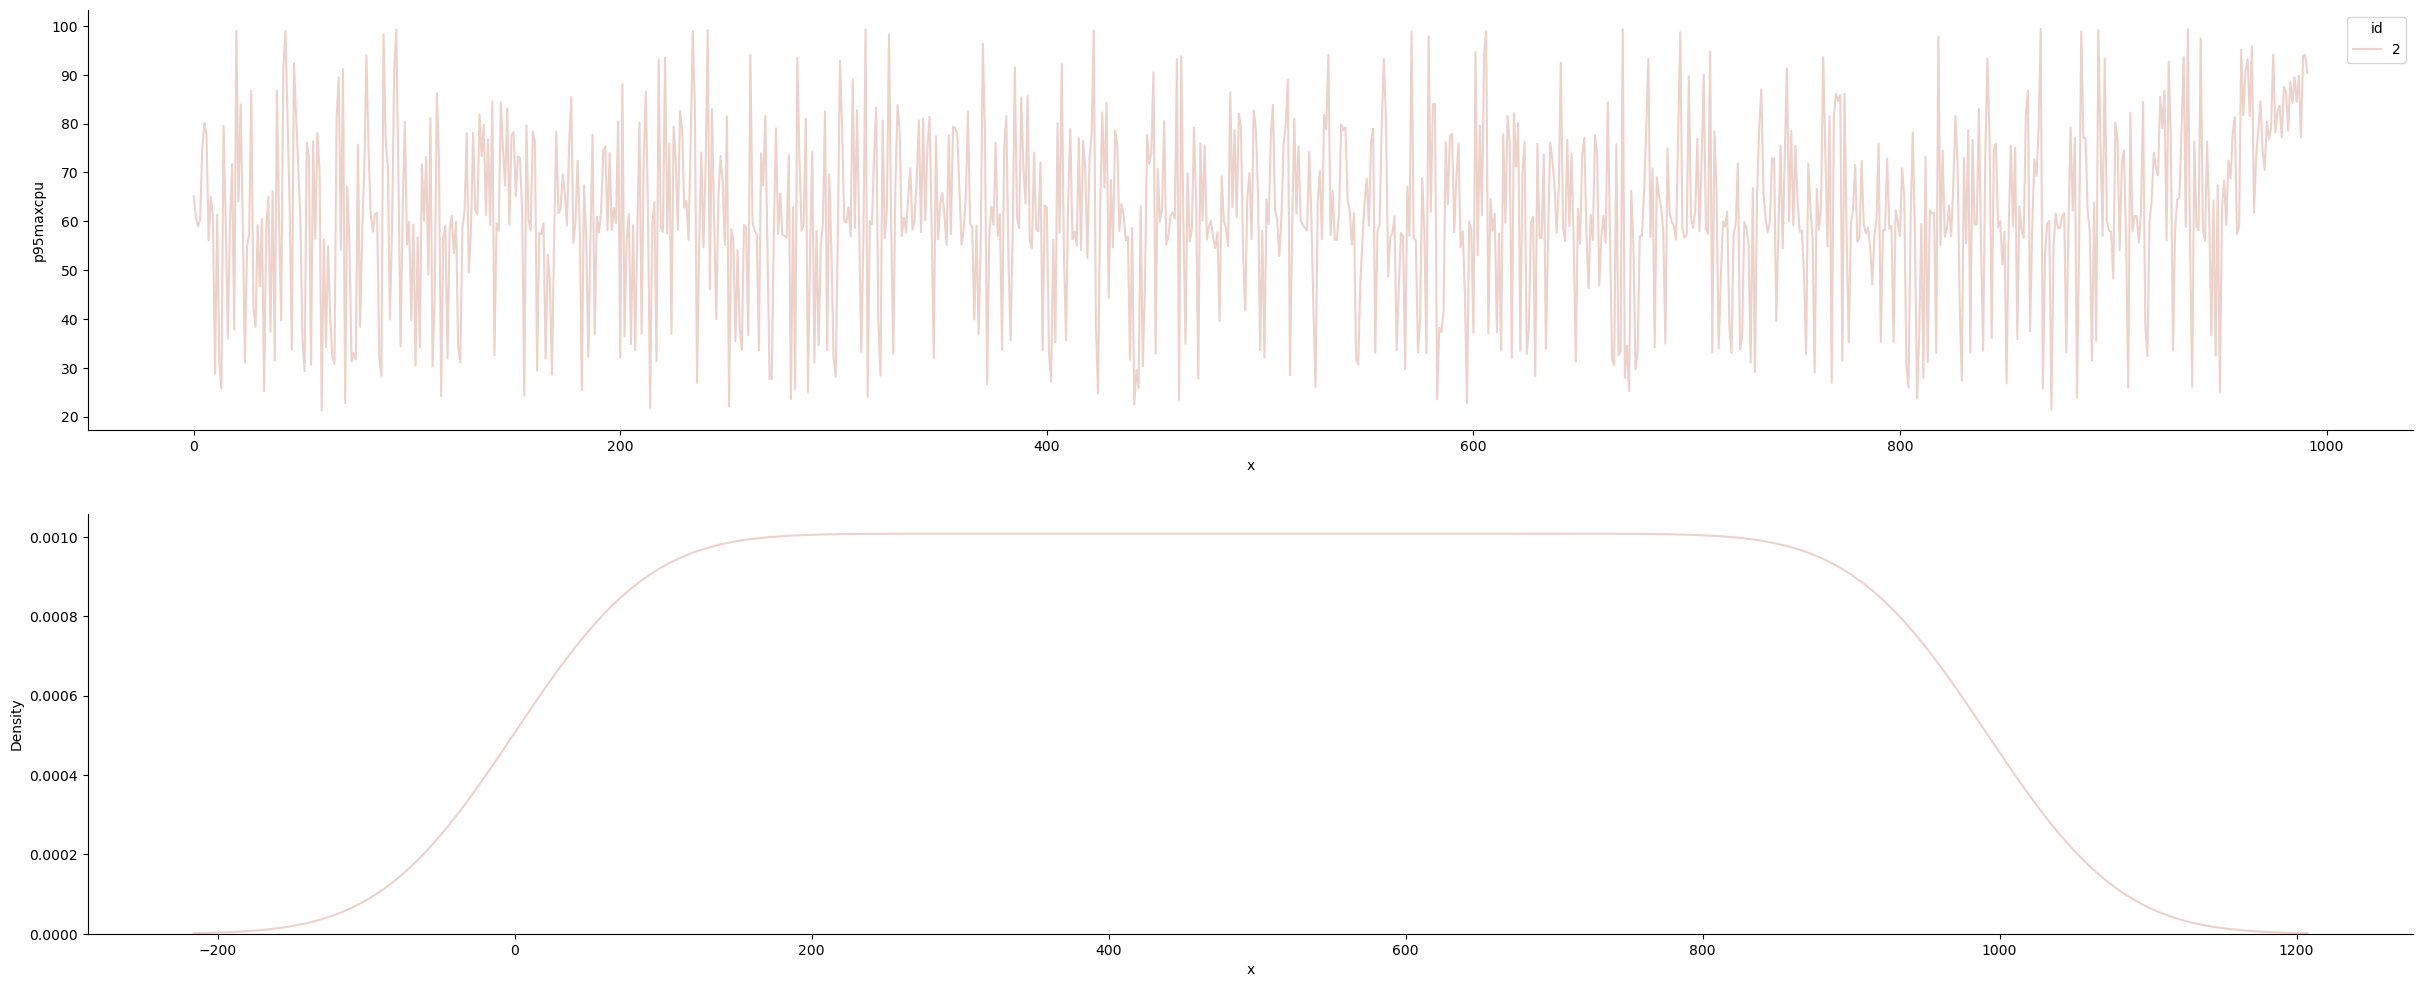

In [4]:
# grouped_df = trace_dataframe.groupby(by=["deploymentid"])
grouped_df = trace_dataframe.groupby(by=["subscriptionid"])
dfs = []
count = 0
for i, (g, dep_df) in enumerate(grouped_df):
    if count == 2:
        break
    if len(dep_df) < 200:
        continue
    # display(dep_df)
    n_time = len(dep_df.vmcreated.unique())
    # if n_time <= 5 or n_time >= 10:
    #     continue
    if n_time <= 20:
        continue
    print(dep_df.vmcreated.unique(), dep_df.vmdeleted.unique())
    dep_df = dep_df.copy()
    dep_df["id"] = count + 1
    dep_df = dep_df.sort_values(by=["vmcreated", "vmdeleted"]).reset_index(drop=True)
    dep_df["x"] = [i for i in range(len(dep_df))]
    fig, axs = plt.subplots(2, 1, figsize=(30, 12))
    sns.lineplot(data=dep_df.iloc[0:5000], x="x", y="p95maxcpu", hue="id", ax=axs[0]) # , hue="id"
    sns.kdeplot(data=dep_df, x="x", hue="id", ax=axs[1])
    axs[1].get_legend().remove()
    # sns.ecdfplot(data=df, x="p95maxcpu", hue="id", ax=axs[1])
    sns.despine()
    # fig.show()
    display(fig)
    plt.close(fig)
    # print(len(dep_df))
    # dep_df.plot(y="p95maxcpu")
    dfs.append(dep_df)
    count+=1

# print(len(dfs))
# df = pd.concat(dfs).reset_index(drop=True)
# df["x"] = [i for i in range(len(df))]
# print(len(df))
# # sns.color_palette("hls", 8)
# # sns.color_palette("Paired")
# fig, axs = plt.subplots(2, 1, figsize=(30, 12))
# sns.lineplot(data=df.iloc[0:5000], x="vmdeleted", y="p95maxcpu", ax=axs[0]) # , hue="id"
# sns.kdeplot(data=df, x="vmdeleted", ax=axs[1], hue="id")
# axs[1].get_legend().remove()
# # sns.ecdfplot(data=df, x="p95maxcpu", hue="id", ax=axs[1])
# sns.despine()
# fig.show()

In [5]:
len(trace_dataframe.subscriptionid.unique())

6687

In [6]:
len(trace_dataframe.deploymentid.unique())

33205

In [7]:
len(trace_dataframe.vmid.unique())

2695548

In [8]:
%%time

def find_first(x):
    idx = x.view(bool).argmax() // x.itemsize
    return idx if x[idx] else -1

def custom_transform(d):
    shifted = d.shift(1, fill_value=0)
    first_idx = find_first(shifted.values == 1)
    if first_idx != -1:
        shifted.iloc[first_idx:] = 1
    return shifted


def discretize_column(df, col, n_bins=4, new_col=None, fr=0, to=100):
    # column = df[col]
    # column = np.clip(column, fr, to)
    if new_col == None:
        new_col = col
    # print( pd.cut(df[col].clip(fr, to), bins=n_bins, labels=False))
    df = df.copy()
    df[new_col] = pd.cut(df[col].clip(fr, to), bins=n_bins, labels=False)
    return df


def feats_bucket_cpu_transform(df, target_name: str = "p95maxcpu", n_bins: int = 4):
    df = df.copy()
    temp_column = f"{target_name}_bucket"
    df = discretize_column(df, target_name, n_bins, temp_column)
    targets = np.array(df[temp_column].values).reshape(-1)
    ohe = np.eye(n_bins)[targets]
    percent_columns = [
        f"{temp_column}_{i}" for i in range(0, n_bins)
    ]
    percent_df = pd.DataFrame(
        ohe,
        columns=percent_columns,
    )
    df = pd.concat([df, percent_df], axis=1)
    df[percent_columns] = df[percent_columns].astype(int)
    df[percent_columns] = df[percent_columns].cumsum()
    df[f'{temp_column}_total'] = df[percent_columns].sum(axis=1)
    df[percent_columns] = df[percent_columns].div(df[f'{temp_column}_total'], axis=0)
    df = df.drop(columns=[f'{temp_column}_total'])
    return df

def feats_one_hot(df, col, drop_first=True):
    df = df.copy()
    vmcategory_df = pd.get_dummies(test_df[col], prefix=col, dtype=int, drop_first=True)
    df = pd.concat([df, vmcategory_df], axis=1)
    df = df.drop(columns=[col])
    return df

def drop_others(df):
    df = df.copy()
    df = df.drop(columns=['vmid', 'subscriptionid', 'deploymentid', 'vmcreated', 'vmdeleted', 'maxcpu', 'avgcpu', 'vmcategory', 'vmcorecountbucket', 'vmmemorybucket', 'lifetime', 'corehour', 'x', 'p95maxcpu'], errors="ignore")
    return df

def ceil_percent(df, target_name):
    df[target_name] = df[target_name].apply(np.ceil)
    df = df.astype({target_name: int})
    return df


grouped_df = trace_dataframe.groupby(by=["deploymentid"])

CPU times: user 219 µs, sys: 0 ns, total: 219 µs
Wall time: 226 µs


In [38]:


def clean_df(data):
    df = data.copy()
    first_bucket = df[df.p95maxcpu <= 20]
    second_bucket = df[(df.p95maxcpu > 27) & (df.p95maxcpu <= 47)]
    third_bucket = df[(df.p95maxcpu >= 50) & (df.p95maxcpu <= 73)]
    fourth_bucket = df[df.p95maxcpu >= 78]
    # display(fourth_bucket)
    return pd.concat([first_bucket, second_bucket, third_bucket, fourth_bucket]).reset_index(drop=True)

def feats_bucket_cpu_transform(df, target_name: str = "p95maxcpu", n_bins: int = 4):
    df = df.copy()
    temp_column = f"{target_name}_bucket"
    df = discretize_column(df, target_name, n_bins, temp_column)
    targets = np.array(df[temp_column].values).reshape(-1)
    ohe = np.eye(n_bins)[targets]
    percent_columns = [
        f"{temp_column}_{i}" for i in range(0, n_bins)
    ]
    percent_df = pd.DataFrame(
        ohe,
        columns=percent_columns,
    )
    df = pd.concat([df, percent_df], axis=1)
    df[percent_columns] = df[percent_columns].astype(int)
    df[percent_columns] = df[percent_columns].cumsum()
    df[f'{temp_column}_total'] = df[percent_columns].sum(axis=1)
    df[percent_columns] = df[percent_columns].div(df[f'{temp_column}_total'], axis=0)
    df = df.drop(columns=[f'{temp_column}_total'])
    return df

def custom_transform_sub(percent_columns):
    # print(percent_columns)
    def fun(df):
        # display(df)
        # columns = list(df.columns)
        df[percent_columns] = df[percent_columns].cumsum()
        df['percent_total'] = df[percent_columns].sum(axis=1)
        df[percent_columns] = df[percent_columns].div(df['percent_total'], axis=0)
        df = df.drop(columns=['percent_total'])
        # df[percent_columns] = df[percent_columns].cumsum()
        # df[f'{temp_column}_total'] = df[percent_columns].sum(axis=1)
        # df[percent_columns] = df[percent_columns].div(df[f'{temp_column}_total'], axis=0)
        # df = df.drop(columns=[f'{temp_column}_total'])
        return df

    return fun


def feats_bucket_cpu_transform_v2(df, target_name: str = "p95maxcpu", n_bins: int = 4):
    df = df.copy()
    temp_column = f"{target_name}_bucket"
    df = discretize_column(df, target_name, n_bins, temp_column)
    targets = np.array(df[temp_column].values).reshape(-1)
    ohe = np.eye(n_bins)[targets]
    percent_columns = [
        f"{temp_column}_{i}" for i in range(0, n_bins)
    ]
    percent_df = pd.DataFrame(
        ohe,
        columns=percent_columns,
    )
    df = pd.concat([df, percent_df], axis=1)
    df[percent_columns] = df[percent_columns].astype(int)
    # df[percent_columns] = df[percent_columns].cumsum()
    # df[f'{temp_column}_total'] = df[percent_columns].sum(axis=1)
    # df[percent_columns] = df[percent_columns].div(df[f'{temp_column}_total'], axis=0)
    # df = df.drop(columns=[f'{temp_column}_total'])
    df = df.groupby(by=["subscriptionid"]).apply(custom_transform_sub(percent_columns)).reset_index(drop=True)
    # df = df.groupby(by=["subscriptionid"]).transform(custom_transform_sub)
    return df

dfs = []

count = 0
for i, g in grouped_df:
    if count == 100:
        break
    if len(g) < 50:
        continue
    test_df = g.copy().reset_index(drop=True)
    dfs.append(test_df)
    count += 1

# test_df = trace_dataframe.copy()
test_df = pd.concat(dfs)
# display(test_df)
test_df = ceil_percent(test_df, "p95maxcpu")
test_df = clean_df(test_df)
test_df = feats_bucket_cpu_transform_v2(test_df)
test_df = feats_one_hot(test_df, "vmcategory")
test_df = feats_one_hot(test_df, "vmcorecountbucket")
test_df = feats_one_hot(test_df, "vmmemorybucket")
test_df = test_df.sort_values(by=["vmcreated", "vmdeleted", "deploymentid"]).reset_index(drop=True)
# test_df = discretize_column(test_df, col="p95maxcpu", n_bins=4, new_col="p95maxcpu_bucket", fr=0, to=100)
test_df = drop_others(test_df)
# print(len(test_df.columns))
# print(test_df.columns)
# test_df.head()
# percent_columns = [
#     f"p95maxcpu_bucket_{i}" for i in range(0, 4)
# ]
# test_df[percent_columns] = test_df[percent_columns].sum(axis=0)
test_df

,p95maxcpu_bucket,p95maxcpu_bucket_0,p95maxcpu_bucket_1,p95maxcpu_bucket_2,p95maxcpu_bucket_3,vmcategory_Interactive,vmcategory_Unknown,vmcorecountbucket_4,vmcorecountbucket_8,vmcorecountbucket_24,vmcorecountbucket_30,vmmemorybucket_4,vmmemorybucket_8,vmmemorybucket_32,vmmemorybucket_64,vmmemorybucket_70
0,0,1.000000,0.000000,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0
1,0,1.000000,0.000000,0.0,0.0,0,1,0,1,0,0,0,0,1,0,0
2,0,1.000000,0.000000,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0
3,0,1.000000,0.000000,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0
4,1,0.284553,0.715447,0.0,0.0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36080,0,1.000000,0.000000,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0
36081,0,1.000000,0.000000,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0
36082,0,1.000000,0.000000,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0
36083,0,1.000000,0.000000,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0


In [18]:
list(test_df.deploymentid.unique())

['+HREXMVf7b+A0zHkyw/Rnzy1znpIQKnf2lnJ5duvDa18Mtqf/v1DPc1RmQMRZ7rt4FLkLZZNieTczycfTzM8NA==',
 '+RCXw7wDYQBRo4prv+nqmOj14G/+KxjCVMtrfZcQ+Ixcj3RyCbvKKcjqEXJ+PwELCgtzQKpkFGh568aYu5Ob7Q==',
 '+U14qHgsYeRQ9X5xXKRXwdMxjLuGllFhMFjthbK2P4zdDlR9xNEmZ9uOggn0JIyY2UYRGwnGhb39vyn/wqSz8Q==',
 '+qsl6upF4G6CBnFVK97vb0yE1lC551CWp9U1lcfnZKmz1Qs4uCaCn+7XdBkY0/YOWTysed3ZPBHYPB36uIFDvA==',
 '+PJBu4zXRFgaaPtZMuE6Ne/MLZfEMBZ2lmWQjAYftL8z0/eyD7jiuLAJ2EbqoTJcHavSR1OriD0nPAjQuRq6yw==',
 '+EEQhQWBts2mVt3Nyw//LT94sLxB37ZRrZzvNDmRBjK97NSr+ZOhyV9LJ9nrUxgU7dmsmJtiiiYblcZxof46Qw==',
 '+RfgQSwsIthiokEX+rZuWW1arz8MdOEQXXQm/h9ZkmjiyBSXAb/mf6z455G7vehBxXvEefHlYhHmMMuXs7pKdA==',
 '+W7qCHCuTTAUFNithvNyUJxkfaBVKAdlCz4gplbGzdQB4lyAizScag+nH0C0HBN5QwSWxSlcAedeV5W9Kgi9oQ==',
 '+96skYEiitRSwWlgWh2R0VJGpk3NyXr9K9D+ZCduhdhGA9XvDPZRyGeGuCDZRfkoB3vhF5K4lC7hcYDYcfJ/Cw==',
 '+HfUtKP6OFgo0cTvXxsj8cJwOyu+cuBF8o8TzLubiLpqAEewr5iqu2cnn4lgrGKV1sBZPqJ53v8fGXDiYgM3Ng==',
 '+CIkWy6aybOZrGMVW86pxZ1mA82TvZERAjuS5lOHDjMbRN+zWVijJBOhY+zCahryQlY5

30
TOTAL DFS 1076
TOTAL DATA 2503


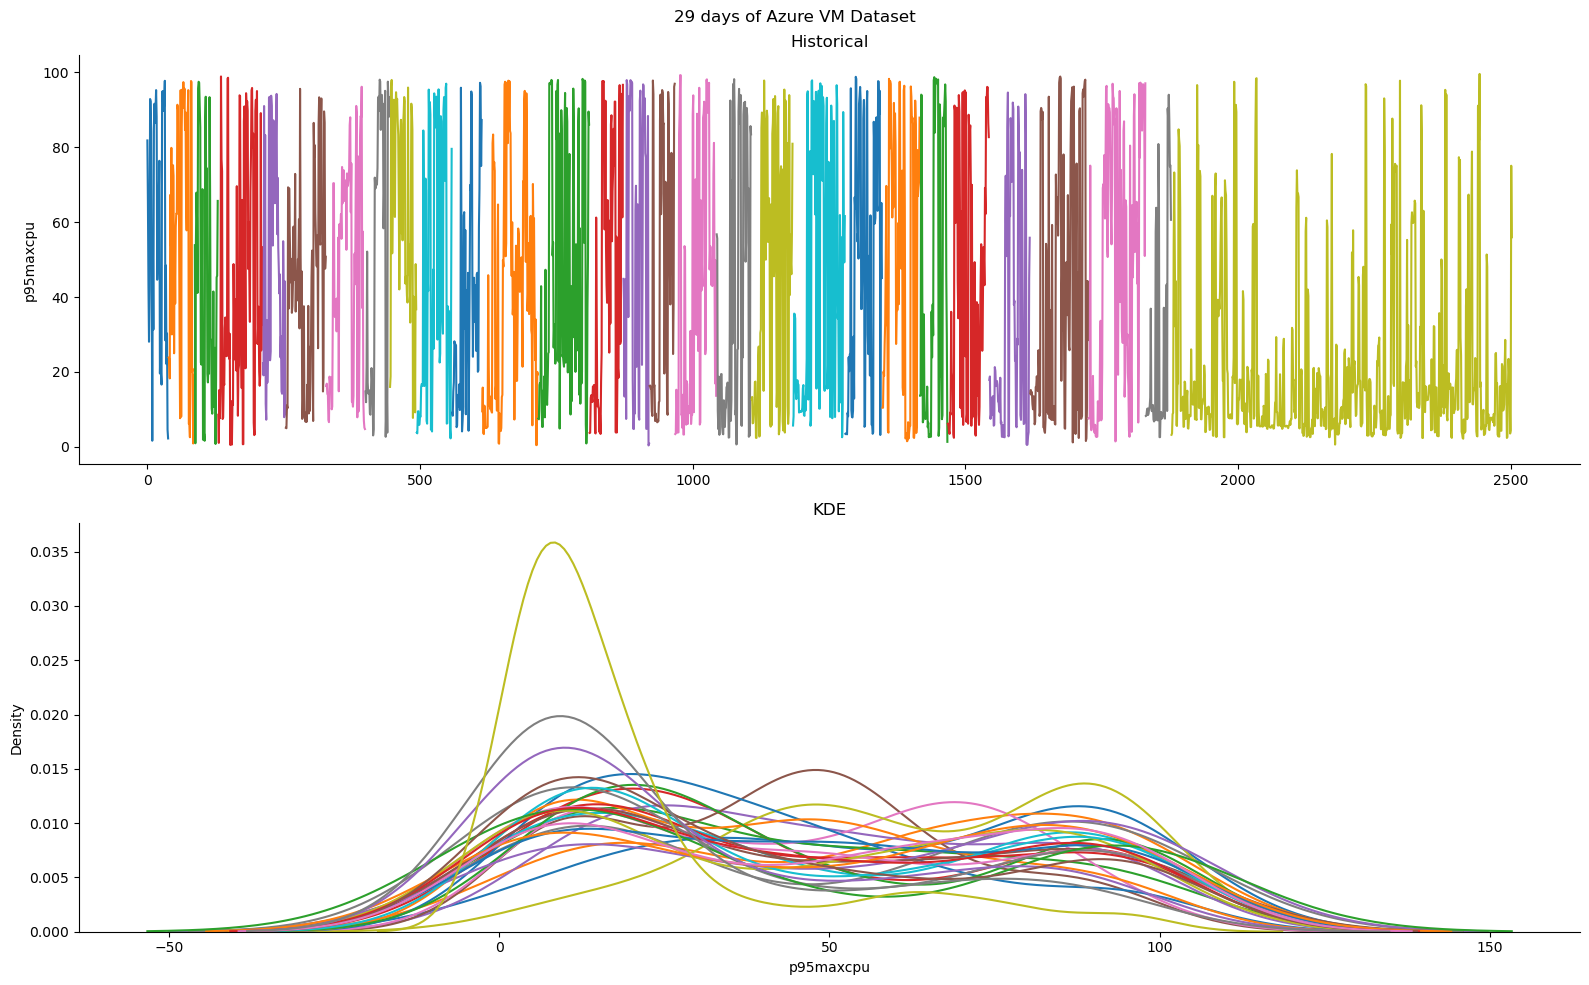

In [163]:
trace_df_day = trace_dataframe.copy()
trace_df_day = trace_df_day[trace_df_day.p95maxcpu > 0]
# trace_df_day["day_created"] = np.floor(trace_df_day["vmcreated"] / (60 * 60 * 24))
# trace_df_day['day_created'] = trace_df_day['day_created'].astype('int')

def create_timestamp(df, col):
    df[f"day_{col}_div"] = df[col] / (60 * 60 * 24)
    df[f'day_{col}'] = np.floor(df[f'day_{col}_div']).astype('int')
    df[f"hour_{col}"] = np.ceil((df[f"day_{col}_div"] - df[f'day_{col}']) * 24)
    df[f'hour_{col}'] = df[f'hour_{col}'].astype('int')
    df[f'quarter_day_{col}'] = np.clip(np.ceil(df[f'hour_{col}'] / 6).astype('int') - 1, 0, 3)
    df[f'half_day_{col}'] = np.clip(np.ceil(df[f'hour_{col}'] / 12).astype('int') - 1, 0, 2)
    df[f'comb_{col}'] = np.floor(df[f'day_{col}']).astype('int').astype(str) + "-" + df[f'hour_{col}'].astype(str)
    return df

trace_df_day = create_timestamp(trace_df_day, "vmdeleted")
trace_df_day = create_timestamp(trace_df_day, "vmcreated")
# trace_df_day['hour_deleted'] = trace_df_day['day_deleted'].astype('int')
grouped_df = trace_df_day.groupby(by=["day_vmcreated"])
print(len(grouped_df))
# grouped_df = trace_dataframe.groupby(by=["subscriptionid"])
dfs = []
# count = 0
day_count = 0
N_DAYS = 29
N_HOURS = 4
for i, (g, day_df) in enumerate(grouped_df):
    day_count += 1
    if day_count == 1:
        continue
    # display(day_df)
    if day_count == N_DAYS:
        break
    dep_df = day_df.groupby(by=["deploymentid"])
    count = 0
    for i, (g, df) in enumerate(dep_df):
        # if count == 1000:
        #     break
        if len(df) < 2:
            continue
        # display(dep_df)
        if len(df.vmcreated.unique()) != 1 or len(df.vmdeleted.unique()) != 1:
            continue
        # print(dep_df.vmcreated.unique(), dep_df.vmdeleted.unique())
        df = df.copy().reset_index(drop=True)
        # dep_df["id"] = count + 1
        # print(len(dep_df))
        # dep_df.reset_index(drop=True).plot(y="p95maxcpu")
        dfs.append(df)
        count+=1

# for df in dfs:
#     sns.lineplot(
#         x=x[index : index + len(team_group)],
#         y=team_group.value,
#         color=COLORS.get(team_name),
#     )
#     index += len(team_group)


df = pd.concat(dfs).reset_index(drop=True)
x = np.arange(len(df))
index = 0
fig, axs = plt.subplots(2, 1, figsize=(16, 10))
for day, day_dataframe in df.groupby("day_vmdeleted"):
    day_df = day_dataframe.sort_values(by=["vmcreated", "vmdeleted", "deploymentid", "subscriptionid"]).reset_index(drop=True)
    # if day == 2:
    #     display(day_df)
    sns.lineplot(
        x=x[index : index + len(day_df)],
        y=day_df.p95maxcpu,
        ax=axs[0],
        # color=COLORS.get(day),
    )
    sns.kdeplot(data=day_dataframe, x="p95maxcpu", ax=axs[1])
    index += len(day_df)
print("TOTAL DFS", len(dfs))
print("TOTAL DATA", len(df))
axs[0].set_title("Historical")
axs[1].set_title("KDE")
fig.suptitle(f"{N_DAYS} days of Azure VM Dataset")
fig.tight_layout()
# data = data.iloc[0:200_000]
# df = df.sort_values(by=["deploymentid", "subscriptionid", "vmcreated", "vmdeleted"]).reset_index(drop=True)
# df["x"] = [i for i in range(len(df))]
# print(len(df))
# # sns.color_palette("hls", 8)
# # sns.color_palette("Paired")
# sns.lineplot(data=df, x="x", y="p95maxcpu", ax=axs[0]) # , hue="id"
# sns.kdeplot(data=df, x="p95maxcpu", ax=axs[1]) # , hue="id"
# sns.lineplot(data=df, x="x", y="p95maxcpu", ax=axs[0], hue="day") # , hue="id"
# sns.kdeplot(data=df, x="p95maxcpu", ax=axs[1], hue="day") # , hue="id"
# axs[1].get_legend().remove()
# sns.ecdfplot(data=df, x="p95maxcpu", hue="id", ax=axs[1])
sns.despine()
fig.show()

4


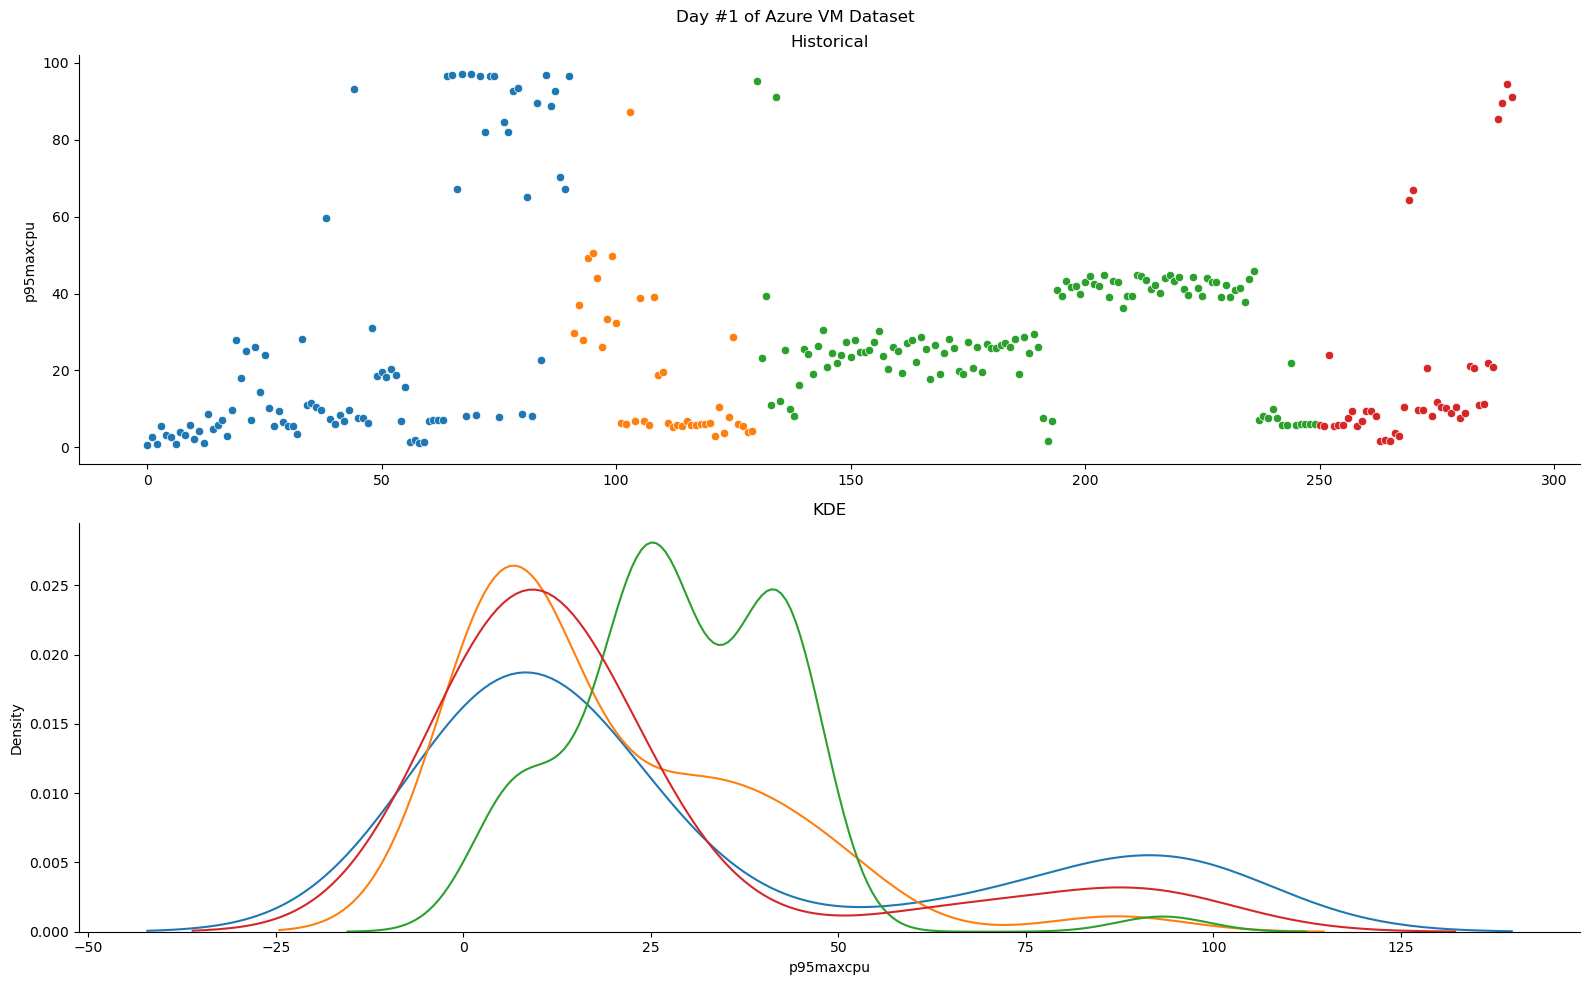

In [149]:
df = pd.concat(dfs).reset_index(drop=True)

index = 0
fig, axs = plt.subplots(2, 1, figsize=(16, 10))

for day, day_dataframe in df.groupby("day_deleted"):
    x = np.arange(len(day_dataframe))
    scale_day_group = day_dataframe.groupby("quarter_day")
    print(len(scale_day_group))
    for hour, hour_df in scale_day_group:
        hour_df = hour_df.sort_values(by=["vmcreated", "vmdeleted", "deploymentid", "subscriptionid"]).reset_index(drop=True)
        if hour == 4:
            pd.set_option('display.max_rows', 500)
            display(hour_df)
        sns.scatterplot(
            x=x[index : index + len(hour_df)],
            y=hour_df.p95maxcpu,
            ax=axs[0],
            # color=COLORS.get(day),
        )
        sns.kdeplot(data=hour_df, x="p95maxcpu", ax=axs[1])
        index += len(hour_df)
    break # get first day only

axs[0].set_title("Historical")
axs[1].set_title("KDE")
fig.suptitle(f"Day #1 of Azure VM Dataset")
fig.tight_layout()
sns.despine()
fig.show()